## Задача 1

Для выборки N=100, представленной вариационным рядом

| xi | -1 | 0 | 1  | 2  | 3  | 4  | 5 |
|----|----|---|----|----|----|----|---|
| ni | 4  | 6 | 12 | 18 | 31 | 23 | 6 |

- Построить полигон относительных частот и гистограмму накопленных частот.

- Найти выборочное среднее и выборочное среднее квадратичное отклонение.

- Определить доверительный интервал с доверительной вероятностью \alpha=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.

- Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости a=0,05.

- Для вычислений можно использовать язык программирования.

## Решение


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xi = np.array([-1, 0, 1, 2, 3, 4, 5])
ni = np.array([4, 6, 12, 18, 31, 23, 6])

# относительные частоты
wi = ni / ni.sum()

df = pd.DataFrame({
    "xi": xi,
    "ni": ni,
    "wi": wi
})

print(df)

   xi  ni    wi
0  -1   4  0.04
1   0   6  0.06
2   1  12  0.12
3   2  18  0.18
4   3  31  0.31
5   4  23  0.23
6   5   6  0.06


### Полигон относительных частот

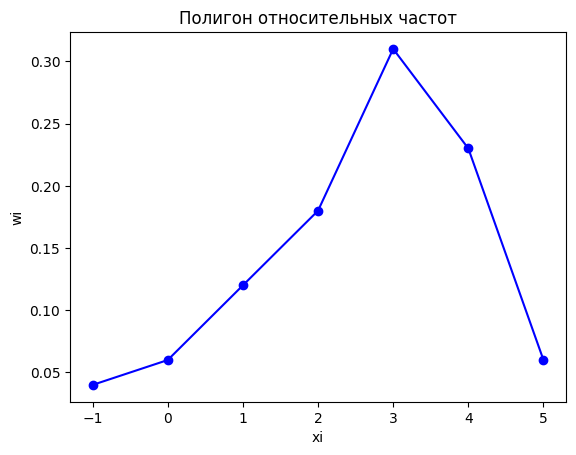

In [21]:
plt.title("Полигон относительных частот")
plt.xlabel("xi")
plt.ylabel("wi")
plt.plot(df["xi"], df["wi"], 'o-b')
plt.show()

<Axes: xlabel='xi', ylabel='wi'>

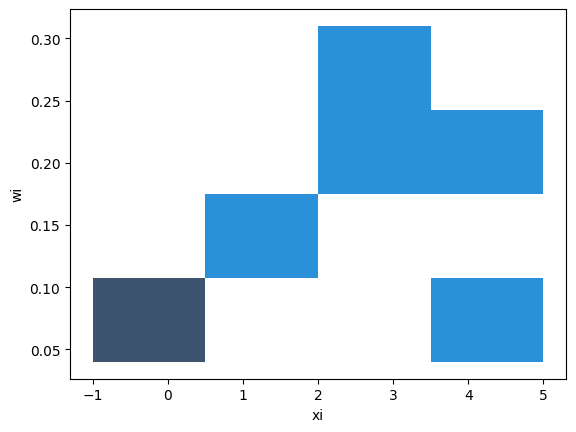

In [35]:
# еще один вариант через seaborn
sns.histplot(df, x="xi", y="wi")


### Гистограмма накопленных частот

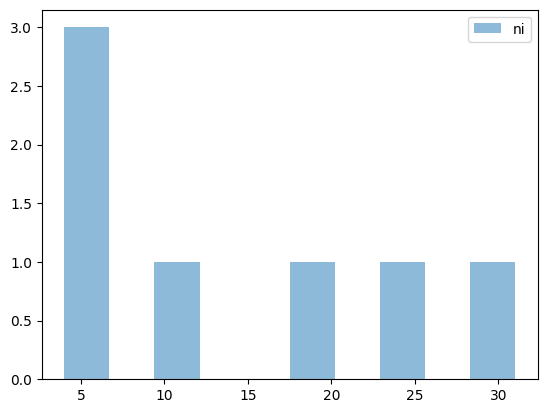

In [22]:
# plt.hist(df["wi"], alpha=0.5, label='wi')
plt.hist(df["ni"], alpha=0.5, label='ni')
plt.legend()
plt.show()